In [8]:
#import data and packages
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import sklearn as sk
%matplotlib inline
sns.set()

In [9]:
from  functions import *

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('kc_house_data.csv')


In [12]:
df.columns




Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:

#check & inspect duplicates id
df[df.id.duplicated(keep=False)]
#duplicates are a result of the same house being sold another time... Therefore do not need to delete

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212c5390>,
      dtype=object)

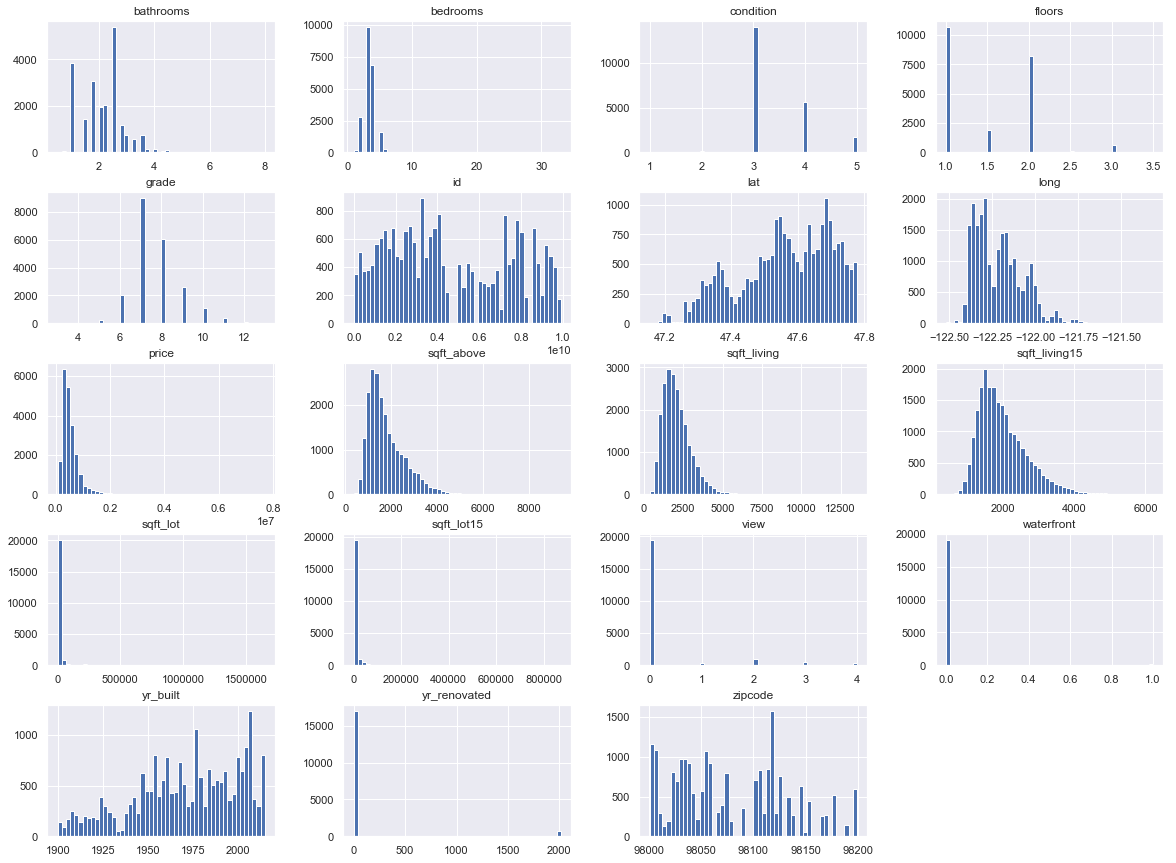

In [13]:
df.hist(bins=50, figsize=(20,15))


In [ ]:
#identify outliers by looking at each indep var vs dep
f.scatter_one_vs_all(df,'log_price')

In [ ]:
# chhose bedroom and bathrooms to elim outliers
outliers = ['bedrooms', 'bathrooms','long']
df = f.remove_outliers(df, outliers)

In [ ]:
 f.scatter_one_vs_all(df,'log_price')


In [ ]:

#check for colinearity
sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidths=.5)

In [ ]:
df.corr()[abs(df.corr()>.75)]


In [ ]:
f.jarque_bera('log_price', df)


In [15]:
test_predictors(['log_sqft_above', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot', 
                 'log_sqft_lot15', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 
                 'condition', 'grade', 'yr_built', 'zipcode', 
                 'view', 'lat', 'long'], df, 6)


# fig = plt.figure(figsize = (15,8))
# fig = sm.graphics.plot_regress_exog(model, "floors", fig = fig)

TypeError: test_predictors() takes 1 positional argument but 3 were given

In [ ]:

from statsmodels.formula.api import ols

f = 'log_price~ log_sqft_living + waterfront + grade + condition + log_sqft_living15 + view + yr_built + zipcode'
model = ols(formula = f, data = df).fit()
model.summary()

In [6]:
df = df[['price','long','lat']]

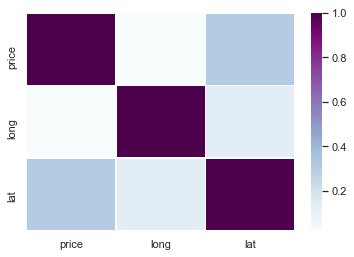

In [7]:
sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidths=.5)

In [21]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ sqft_basement', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     17.78
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:03:27   Log-Likelihood:            -3.0496e+05
No. Observations:               21597   AIC:                         6.105e+05
Df Residuals:                   21293   BIC:                         6.129e+05
Df Model:                         303                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5

In [14]:
# clean_data(df)

In [11]:
# check for ?
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
replace_null_w_median(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
replace_null_w_median()

TypeError: could not convert string to float: '?'

In [8]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df.sqft_basement

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6           NaN
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18          NaN
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       NaN
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len